# Exercise 1
## Exercise 1.1
### Average value

We start by loading the output from the exercise1_1.cpp program, it containes, in three columns, the block number, the progressive average and the prograssive error. 
Before importing we import the required libraries for plotting and analysis

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

As explained above we import the file, assigning each column to a numpy array

In [5]:
x, avg, err_avg = np.loadtxt("out1_1.txt", unpack = True)

We now plot $\langle r \rangle - \frac{1}{2}$ vs. the number of blocks with errorbars (all from the data generated by the c++ code)

Text(0.5, 1.0, 'Plot of the estimated average')

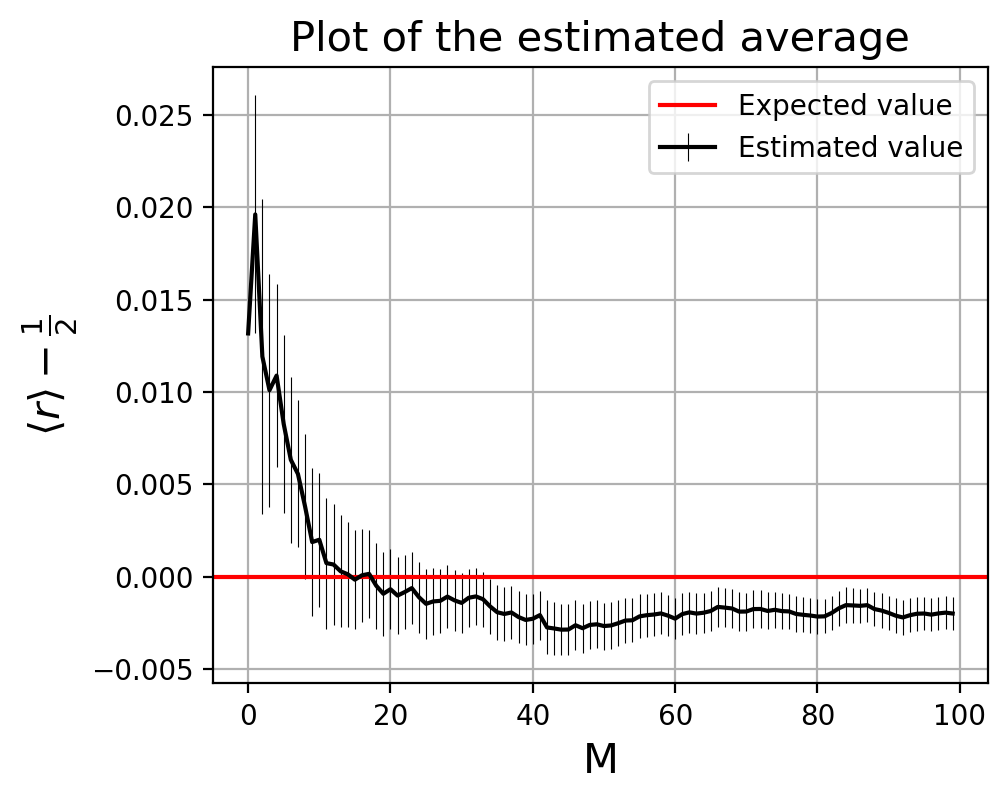

In [4]:
plt.figure(figsize = (5,4), dpi = 200)
plt.errorbar(x, avg - 0.5, err_avg, label = "Estimated value", color = "black", elinewidth = 0.4)
plt.axhline(0, color = "red", label = "Expected value")
plt.ylabel(r'$\langle r \rangle - \frac{1}{2}$', fontsize = 15)
plt.xlabel("M", fontsize = 15)
plt.legend()
plt.grid()
plt.title("Plot of the estimated average", fontsize = 15)

## Exercise 1.2
### Testing Variance

We now import the file containing the estimate for $\sigma^2$, as the previous one it contains three columns with block, estimate for the variance and error.
From the variance its expected value $\left(\frac{1}{12}\right)$ has already been subtracted.

In [5]:
x, var, err_var = np.loadtxt("out1_2.txt", unpack = True)

Text(0.5, 1.0, 'Plot of the estimated variance')

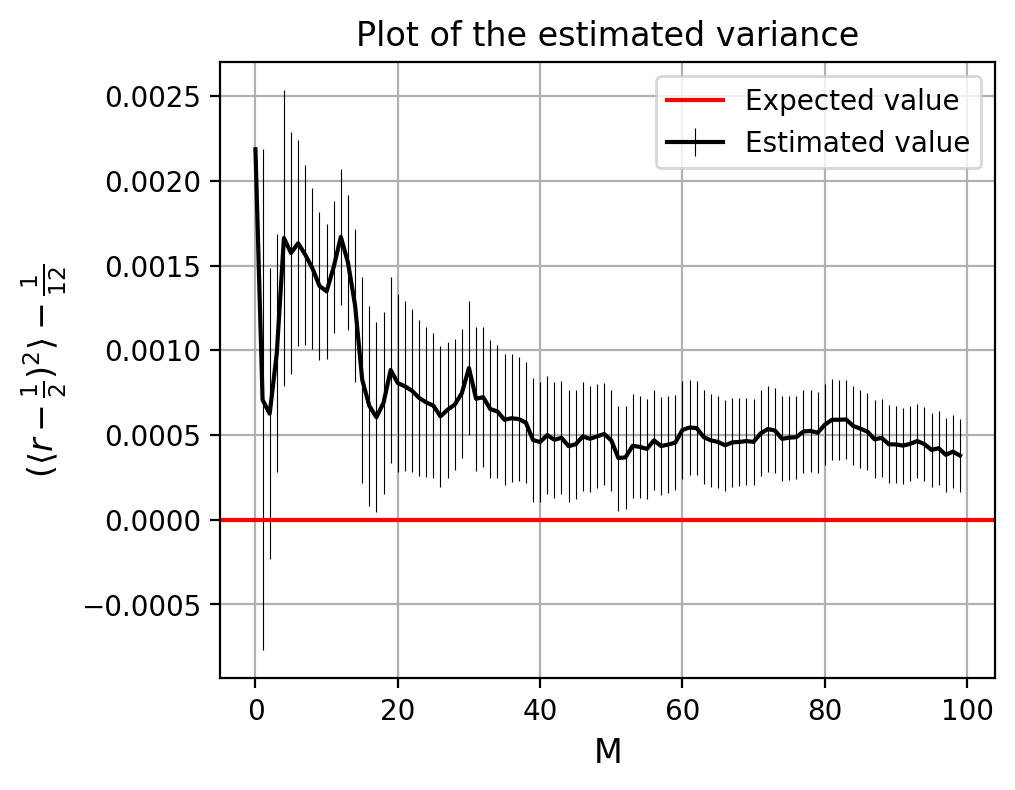

In [6]:
plt.figure(figsize = (5,4), dpi = 200)
plt.errorbar(x, var, err_var, label = "Estimated value", color = "black", elinewidth = 0.4)
plt.axhline(0, color = "red", label = "Expected value")
plt.legend()
plt.grid()
plt.ylabel(r'$(\langle r - \frac{1}{2} )^2\rangle - \frac{1}{12}$', fontsize = 12)
plt.xlabel("M", fontsize = 12)
plt.title("Plot of the estimated variance")

## Exercise 1.3
### $\chi^2$ test

We load the results for the $\chi^2$ test and check wether they comply with the expected value of $\chi^2=100$

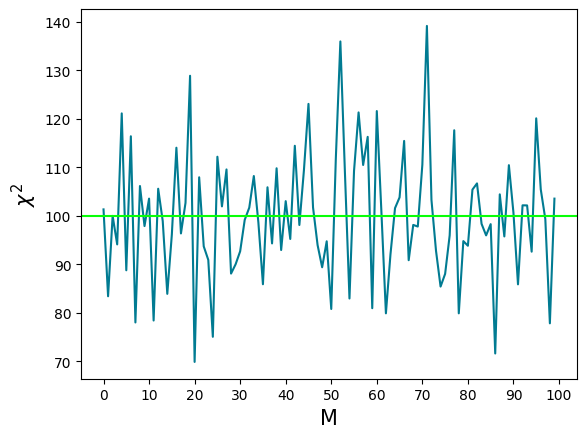

In [20]:
chi = np.loadtxt("chiout.dat", unpack = True)
plt.plot(chi, c = "xkcd:ocean")
plt.axhline(100, c = "xkcd:fluorescent green")
plt.xlabel("M", fontsize = 15)
plt.ylabel(r"$\chi^2$", fontsize = 15)
plt.xticks(np.arange(0, 110, 10));

We can further see from an histogram of the values of $\chi^2$ that, while there is a certain spread in the values, they are peaked around the expected value of 100

Text(0, 0.5, 'Count')

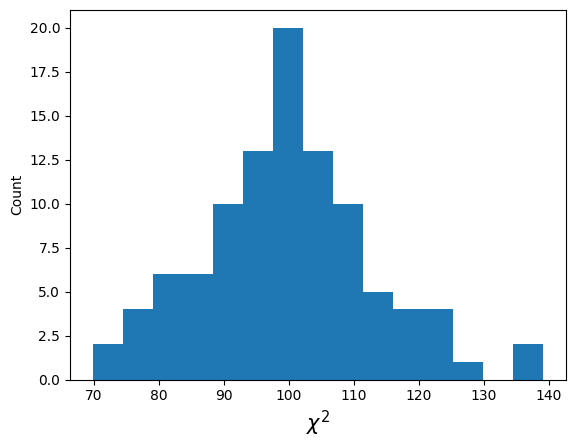

In [29]:
plt.hist(chi, 15);
plt.xlabel(r"$\chi^2$", fontsize = 15)
plt.ylabel("Count")

## Exercise 2.1

First we test the output from the Lorentz and exponential generators

In [2]:
ran_exp = np.loadtxt("exp.dat", unpack = True)
ran_lorentz = np.loadtxt("lorentz.dat", unpack = True)
lorentz_restricted = ran_lorentz[np.abs(ran_lorentz) < 15 ]

We plot histograms of the distributions, the Lorentz distribution, having infinite variance, has been restricted to the interval (-15, 15)

Text(0.5, 1.0, 'Exponential distribution')

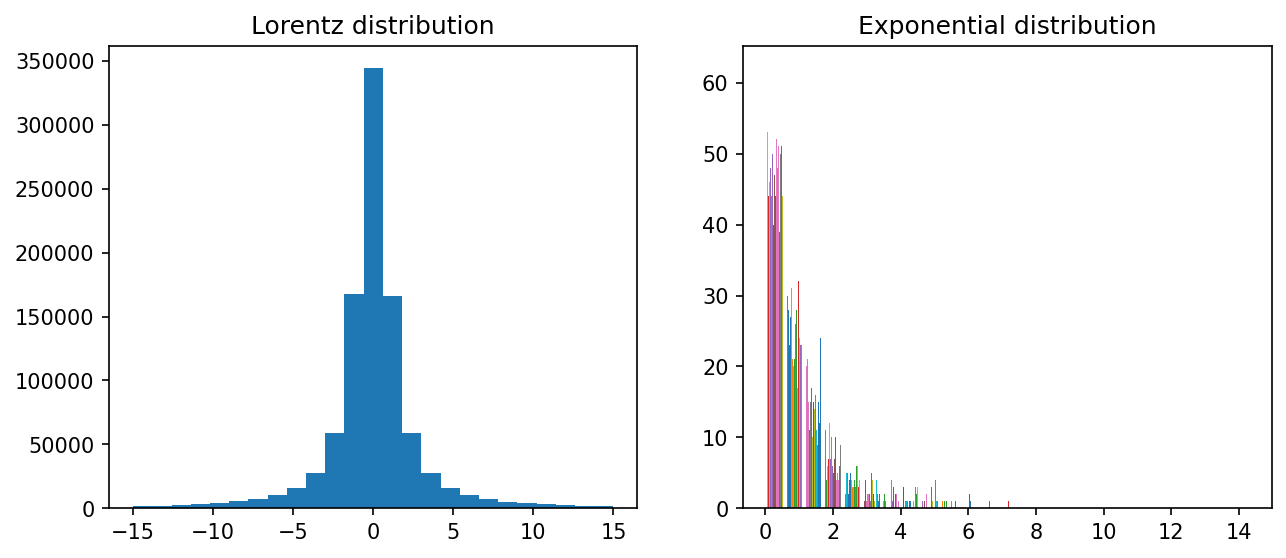

In [3]:
fig, axs =  plt.subplots(1,2, figsize = (10, 4), dpi = 150)
axs[0].hist(lorentz_restricted, 25)
axs[0].set_title("Lorentz distribution")
axs[1].hist(ran_exp, 25)
axs[1].set_title("Exponential distribution")


## Exercise 2.2

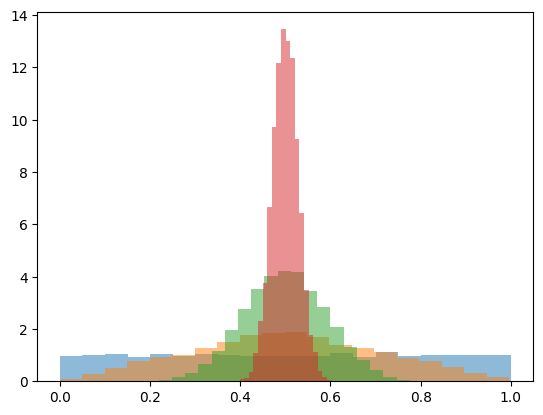

In [49]:
std_dice = np.loadtxt("standard.dat", unpack = True)
for i in range(4):
    plt.hist(std_dice[i,:], bins = 20, alpha = 0.5, density = True)

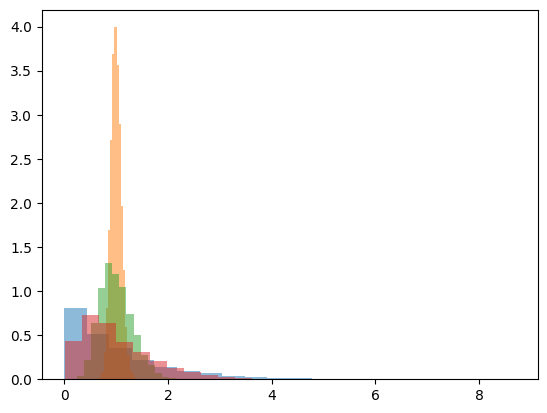

In [70]:
exp_dice = np.loadtxt("exponential.dat", unpack = True)
for i in range(4):
    plt.hist(exp_dice[-i,:], bins = 20, alpha = 0.5, density = True)

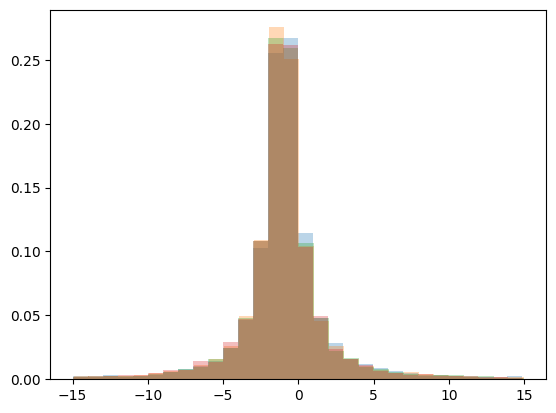

In [75]:
lor_dice = np.loadtxt("lorentz.dat", unpack = True)

for i in range(4):
    lor_i = lor_dice[i,:]
    lorentz_restricted = lor_i[np.abs(lor_i) < 15 ]
    plt.hist(lorentz_restricted, bins = 30, alpha = 0.3, density = True)

In [64]:
lor_dice[0,:]

array([50.16739069, -0.8004068 , -0.84425991, ...,  0.11984173,
       -0.16020391, -0.28875546])

## Exercise 3.1

This exercise involves estimating $\pi$ using the Buffon experiment. The simulation is performed by repeating a throw for two values, the x and y projection of a vector, until its norm is less or equal to 1, then these projections are used to find the height of the tip of the needle and a check is done to see wheter it crosses a line or not.


In [6]:
x, pi_est, pi_err = np.loadtxt("out_pi.txt", unpack = True)

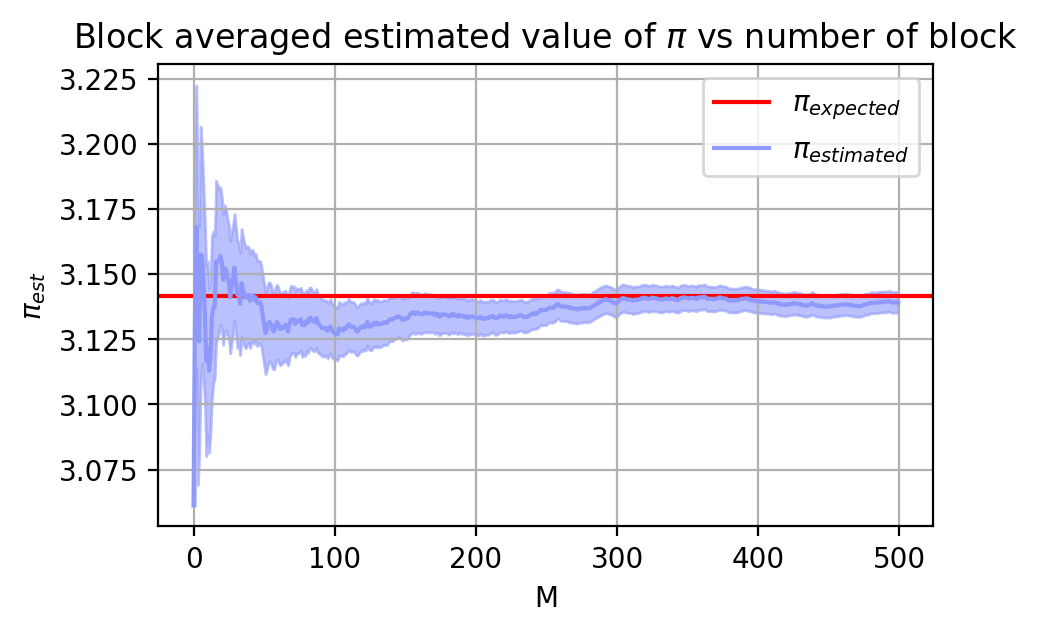

In [12]:
plt.figure(figsize = (5,3), dpi = 200)
plt.axhline(np.pi, color = "red", label = r"$\pi_{expected}$")

plt.plot(x, pi_est, label = r"$\pi_{estimated}$", color = "xkcd:periwinkle blue")
plt.fill_between(x, pi_est + pi_err, pi_est - pi_err, color = "xkcd:periwinkle blue",alpha =0.6)
plt.grid()
plt.xlabel("M")
plt.ylabel(r"$\pi_{est}$")
plt.title(r"Block averaged estimated value of $\pi$ vs number of block")
plt.legend()
plt.savefig("pi_buffon.png")